<a href="https://colab.research.google.com/github/rachocr/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

In [63]:
data = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [64]:
data.shape

(7787, 12)

In [65]:
import re
def convert_to_minutes(duration):
    if 'season' in duration or 'seasons' in duration:
        seasons = int(re.findall(r'\d+', duration)[0])
        return seasons * 500
    else:
        return int(re.findall(r'\d+', duration)[0])

# Apply the function to the 'duration' column
data['duration'] = data['duration'].apply(convert_to_minutes)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data['listed_in'] = data['listed_in'].str.lower().str.replace(r",|movies|tv|shows|language"
, '', regex=True)
data['listed_in'] = data['listed_in'].str.replace('sci-fi & fantasy', 'scifi')
data['listed_in'] = data['listed_in'].str.replace('stand-up comedy', 'comedy')
data['listed_in'] = data['listed_in'].str.replace('comedies', 'comedy')
data['listed_in'] = data['listed_in'].str.replace('anime features', 'anime')


listed_in = vectorizer.fit_transform(data['listed_in'])
vectorizer.get_feature_names_out()
# print(len(listed_in.toarray()))
df_tmp = pd.DataFrame(listed_in.toarray() ,columns=vectorizer.get_feature_names_out())
df_tmp['title'] = data['title'].values

In [67]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'listed_in', 'description']


In [68]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [69]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,1,82,4049,3160,39,207,2020,8,4,403,3912
1,1111,0,124,1840,1589,308,391,2016,8,93,352,1390
2,2222,0,67,1289,6200,379,378,2011,5,78,378,7172
3,3333,0,126,3445,1788,549,1209,2009,4,80,86,3936
4,4444,0,60,3176,2924,549,584,2008,4,123,336,138


In [70]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['show_id', 'date_added', 'description']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [71]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,type,title,director,cast,country,release_year,rating,duration,listed_in
0,1.493694,-1.695350,1.029787,-0.267880,-1.975883,0.692878,0.486133,-1.278234,1.059519
1,-0.669481,-1.676666,-0.623335,-1.008655,-0.524301,0.236092,0.486133,0.468664,0.644904
2,-0.669481,-1.702023,-1.035681,1.165573,-0.141169,-0.334890,-1.049159,0.174243,0.856276
3,-0.669481,-1.675776,0.577779,-0.914820,0.776188,-0.563284,-1.560922,0.213499,-1.517598
4,-0.669481,-1.705137,0.376471,-0.379161,0.776188,-0.677480,-1.560922,1.057505,0.514828


In [72]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,7787.0,1.277462e-17,1.637669,-3.232791,-1.910630,0.531455,1.242151,4.111756
col2,7787.0,-7.299784e-18,1.083235,-2.913614,-0.753758,-0.085389,0.620088,7.866161
col3,7787.0,0.000000e+00,1.027960,-2.842928,-0.730941,0.001120,0.742624,2.481627


In [73]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.2979573274013759
Explained variance of PC2 0.13036075816505607
Explained variance of PC2 0.11739622812519396


In [74]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=ds.columns)
loading_matrix

,PC1,PC2,PC3
type,-0.908654,0.161789,-0.045574
title,-0.030957,0.124738,0.707872
director,-0.731572,0.249143,-0.064738
cast,-0.079220,-0.019908,0.696919
country,-0.120678,0.559209,0.089385
release_year,-0.356397,-0.549671,-0.020273
rating,-0.510658,-0.389065,-0.037979
duration,0.912945,-0.156593,0.039833
listed_in,-0.279383,-0.527681,0.228527


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

2. Create a scree plot for each principal component

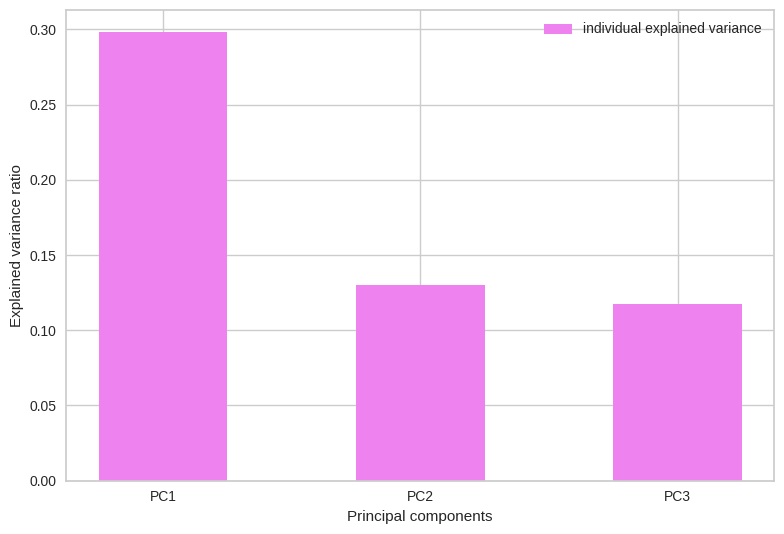

In [75]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

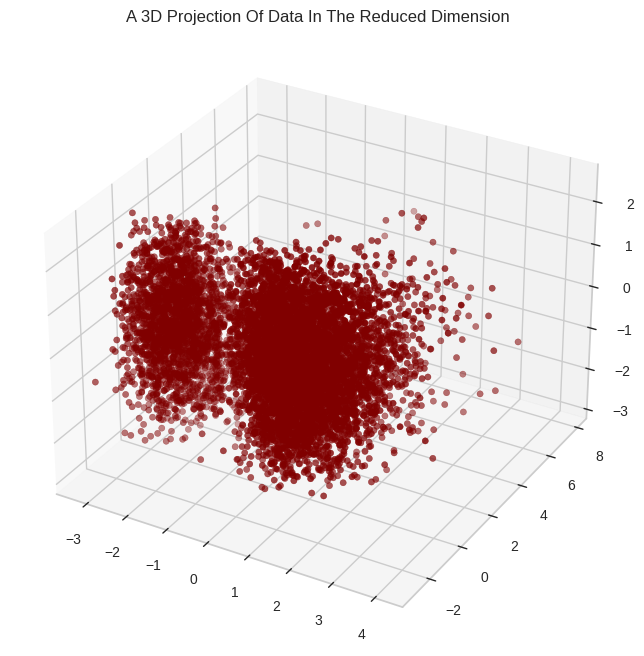

In [76]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


*3*. Use any clustering algorithm to create clusters

Elbow Method to determine the number of clusters to be formed:


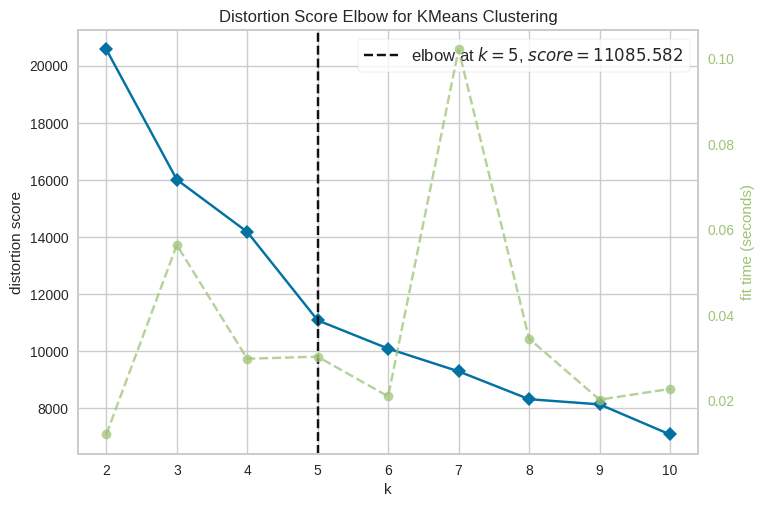

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [78]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
y_kmeans = kmeans.fit(PCA_ds)
PCA_ds["Clusters"] = y_kmeans.labels_
data["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(PCA_ds, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 11086.786938675854
The average silhouette score is : 0.4952209622837456


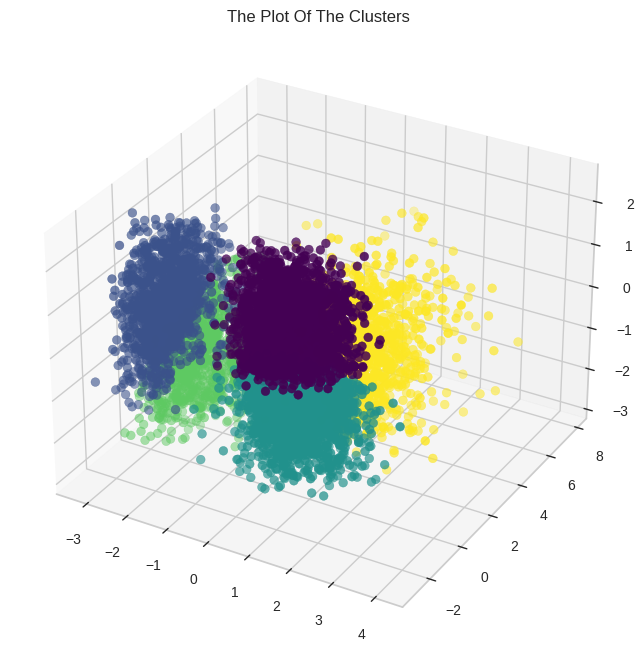

In [79]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

4. Profile each cluster that you have generated based on your experiments

<ipython-input-80-2f63248a592e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)
<ipython-input-80-2f63248a592e>:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=data["Clusters"], palette= pal)


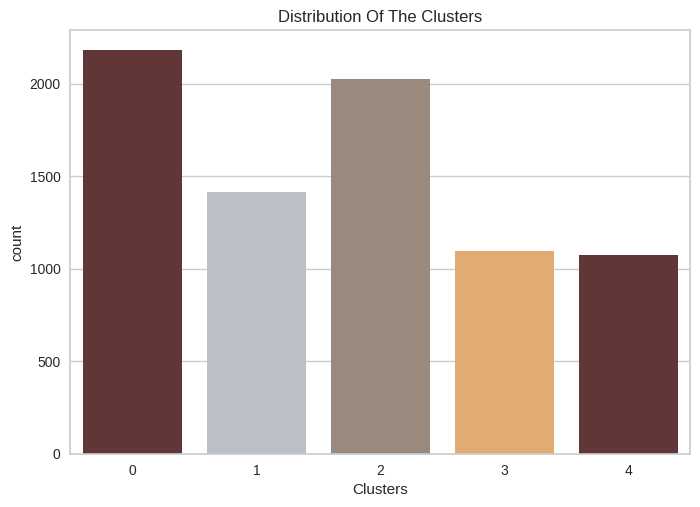

In [80]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


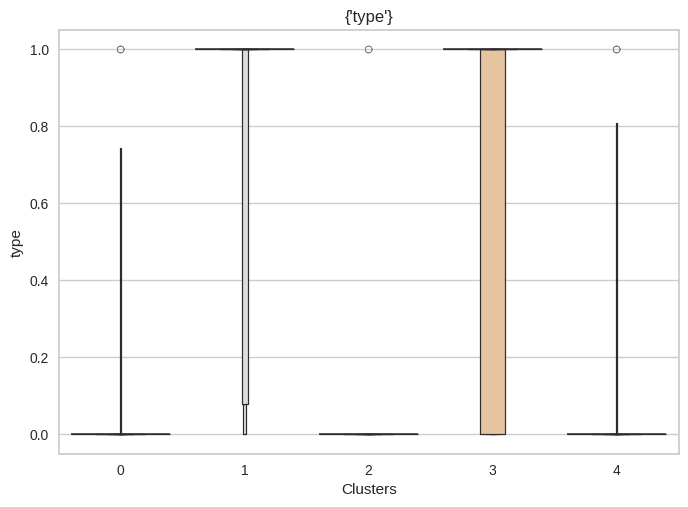

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


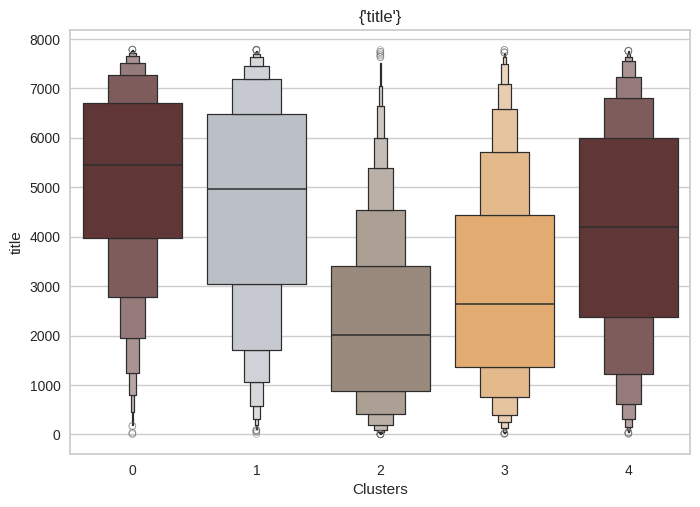

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


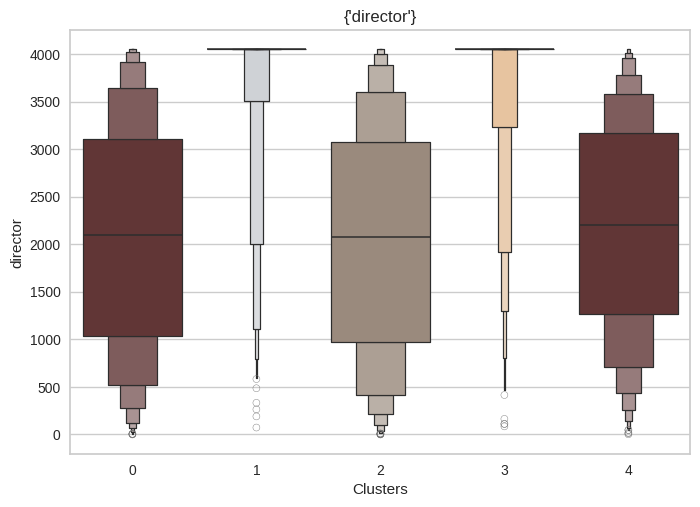

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


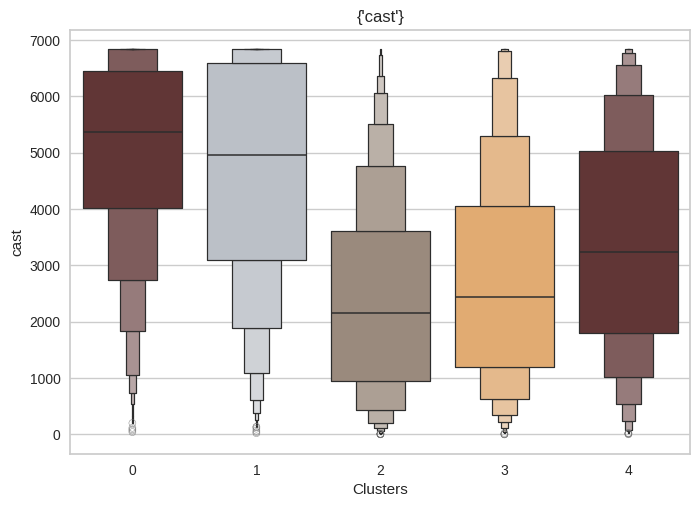

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


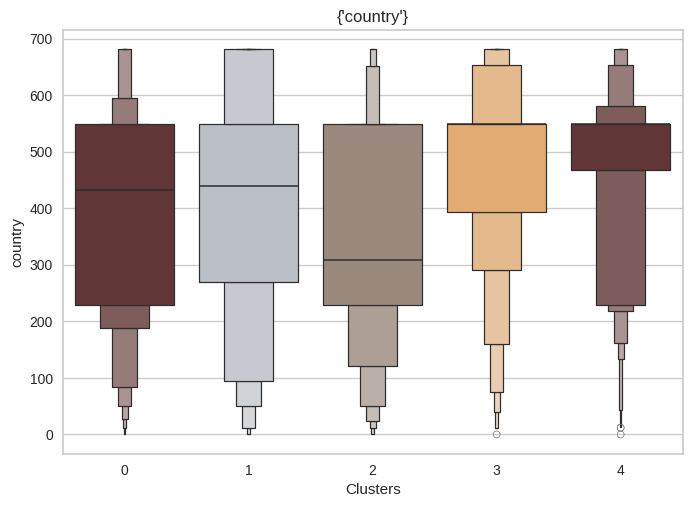

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


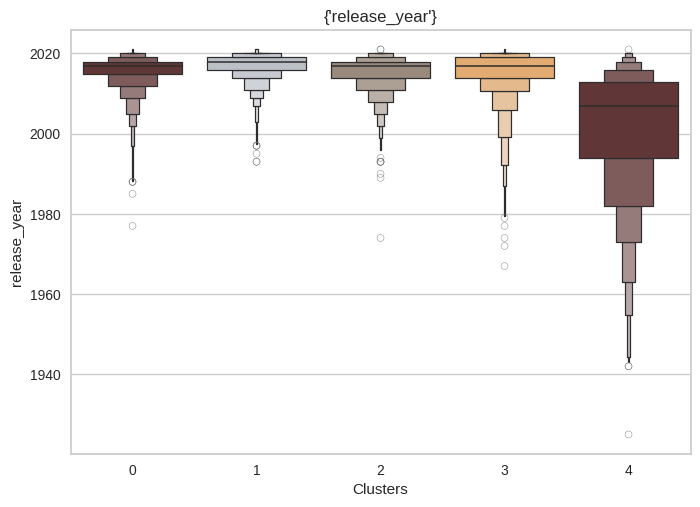

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


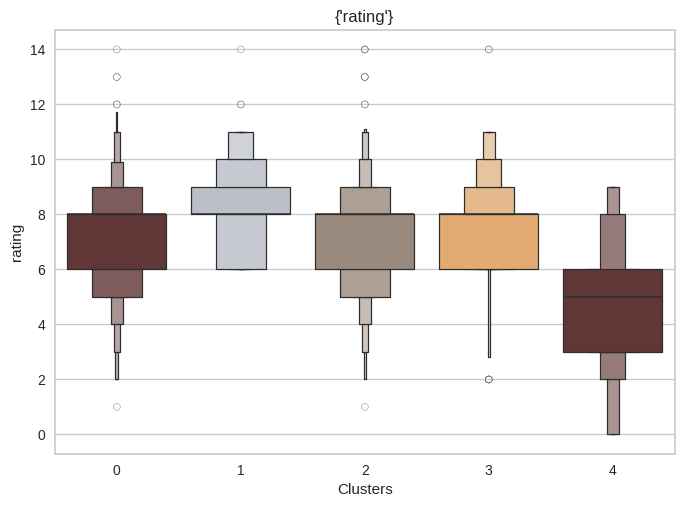

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


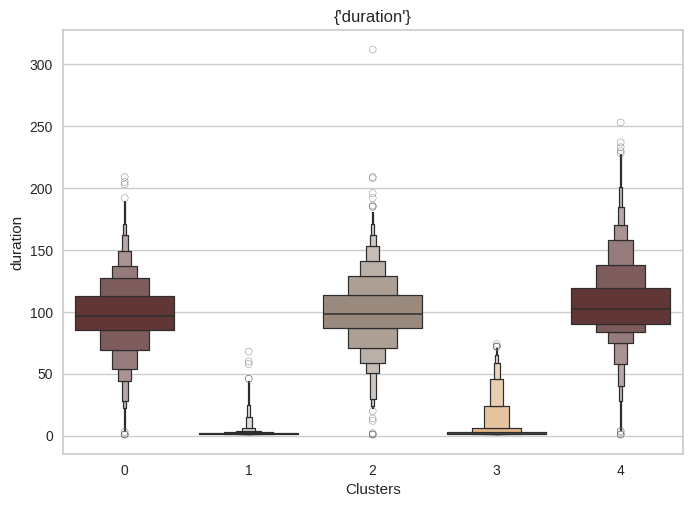

<ipython-input-81-f725d33f2b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
<ipython-input-81-f725d33f2b3e>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)


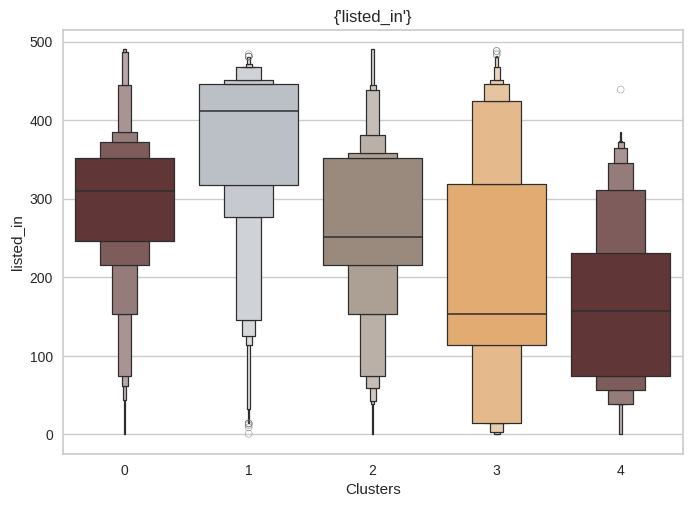

In [81]:
for col in ds.columns:

  plt.figure()
  pl=sns.boxenplot(y=data[col],x=data["Clusters"], palette= pal)
  pl.set_title({col})
  plt.show()



<ipython-input-82-57819dd289b0>:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = data,x=data["release_year"], y=data["country"],hue=data["Clusters"], palette= pal)


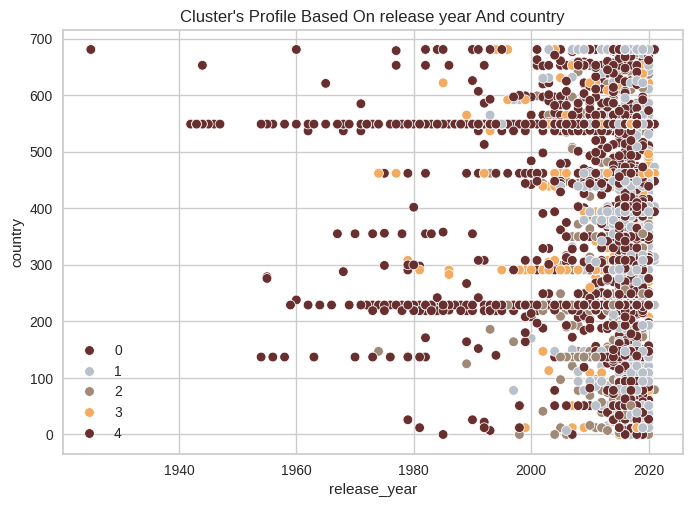

In [82]:
pl = sns.scatterplot(data = data,x=data["release_year"], y=data["country"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On release year And country")
plt.legend()
plt.show()

<ipython-input-83-295f24084006>:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = data,x=data["country"], y=data["listed_in"],hue=data["Clusters"], palette= pal)


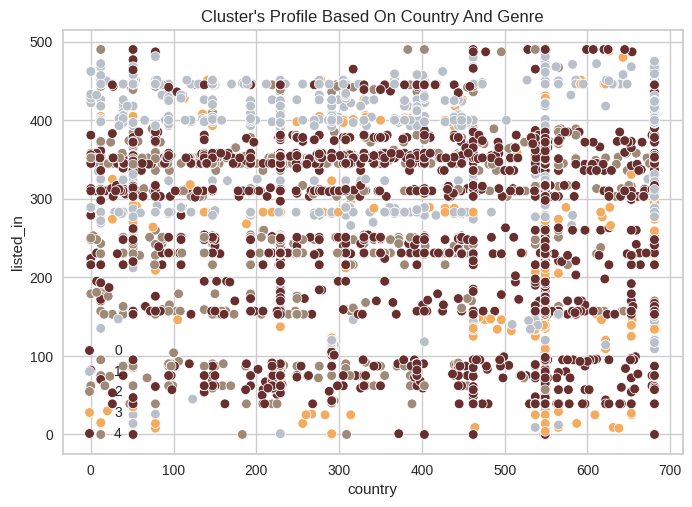

In [83]:
pl = sns.scatterplot(data = data,x=data["country"], y=data["listed_in"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Country And Genre")
plt.legend()
plt.show()